In [ ]:
# loading the dataset
from sklearn.datasets import load_breast_cancer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### PREPROCESSING

In [ ]:
breast_data = load_breast_cancer().data
print("Features:", breast_data.shape)  ### 569 rows and 30 columns expected

breast_labels = np.reshape(load_breast_cancer().target, (569,1))
print("Target:", breast_labels.shape) ### 569 rows and 1 target column expected

Features: (569, 30)
Target: (569, 1)


In [ ]:
## Creating a Pandas dataframe for the dataset with the last column as the target variable

final_breast_data = np.concatenate([breast_data,breast_labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = load_breast_cancer().feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'] = breast_dataset['label'].astype(int)
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Dividing the values into the features and labels
X = breast_dataset.iloc[:,:30].values
y = breast_dataset.iloc[:,30].values

print(np.shape(X), np.shape(y))

(569, 30) (569,)


### VISUALISATION BEFORE DIMENTIONALITY REDUCTION

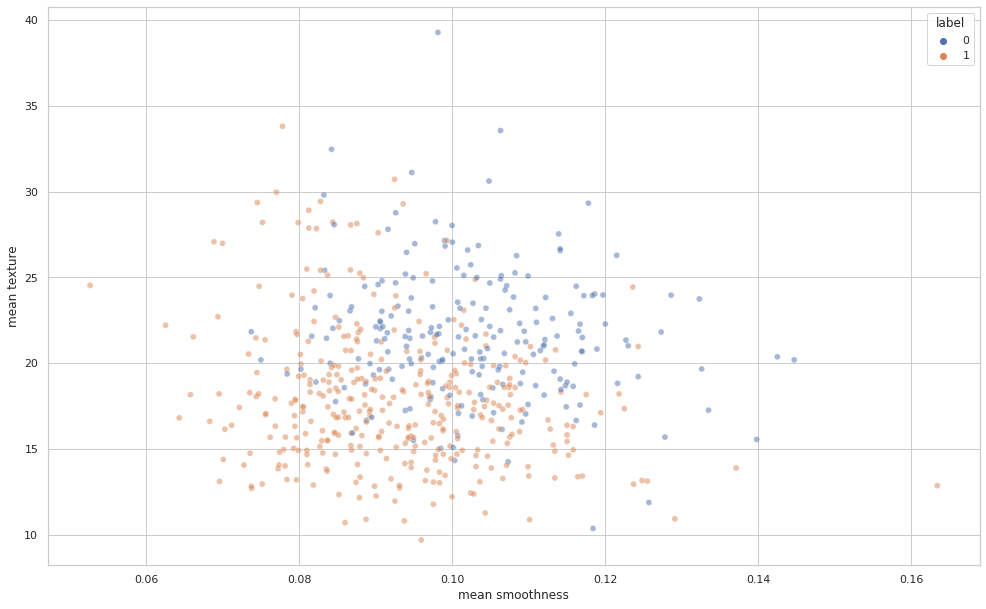

In [ ]:
sns.set(rc={'figure.figsize':(16.7,10.27)})
sns.set(style='whitegrid')
sns.scatterplot(x='mean smoothness', y='mean texture', data = breast_dataset, hue = 'label', alpha=0.5)

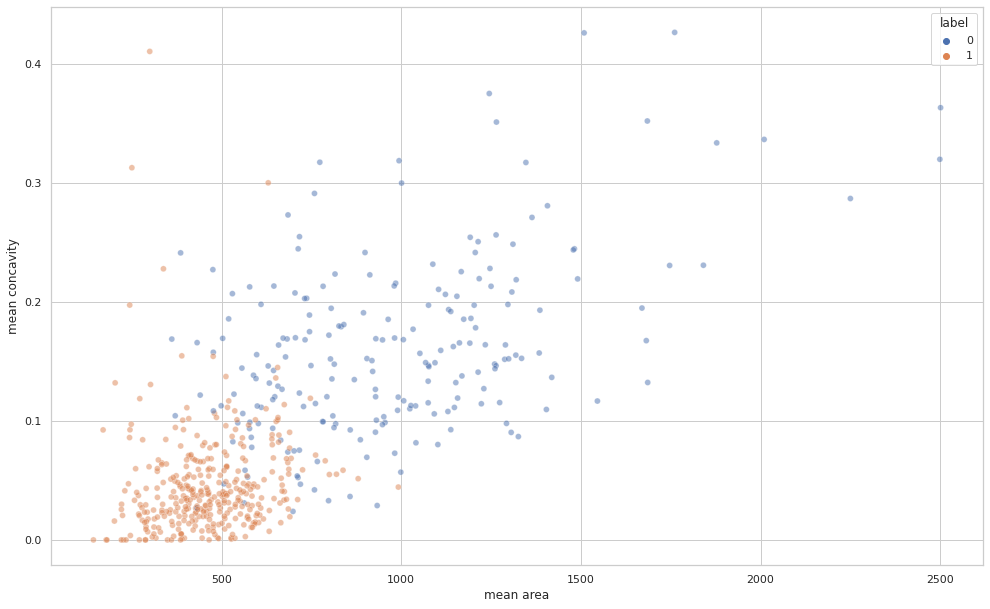

In [ ]:
sns.set(rc={'figure.figsize':(16.7,10.27)})
sns.set(style='whitegrid')
sns.scatterplot(x='mean area', y='mean concavity', data = breast_dataset, hue = 'label', alpha=0.5)

In [ ]:
fig = px.scatter_3d(breast_dataset, x='mean area', y='mean concavity', z='mean texture', color='label', title="3D Visualisation", opacity = 0.7, color_continuous_scale=px.colors.sequential.Viridis)
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

# USING PCA

### 1. Standardisation

---

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print("Mean: ",X_std.mean())
print("Standard Deviation: ",X_std.std())

Mean:  -6.826538293184326e-17
Standard Deviation:  1.0


### 2. Computing covariance matrix

---

In [ ]:
mean_vec = np.mean(X_std, axis=0) ## Computing feature wise means

cov_mat = 1/ (X_std.shape[0]-1) * (X_std - mean_vec).T.dot(X_std - mean_vec)

print('Covariance matrix first 5 rows and columns:\n', cov_mat[0:5, 0:5])

Covariance matrix first 5 rows and columns:
 [[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


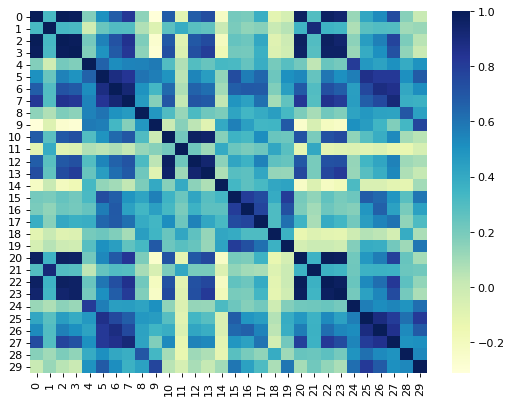

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
dataplot = sns.heatmap(cov_mat, cmap="YlGnBu")
plt.show()

In [ ]:
cov_mat.shape

(30, 30)

### 3. Calculating the eigenvectors and eigenvalues

---

Since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues for this matrix.

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

### 4. Computing the Principal Components

---

In [ ]:
#Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = []
for i in range(len(eig_vals)):
  eig_pairs.append( (np.abs(eig_vals[i]), eig_vecs[:,i]) )


# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)


# To visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Top 10 Eigenvalues in descending order:')
for i in eig_pairs[:10]:
    print(i[0])

Top 10 Eigenvalues in descending order:
13.304990794374557
5.701374603726145
2.8229101550062268
1.984127517730196
1.6516332423301192
1.2094822398029743
0.6764088817009052
0.4774562546895081
0.417628782107817
0.3513108748817331


Plotting the variance explained and choosing the number of Principal components

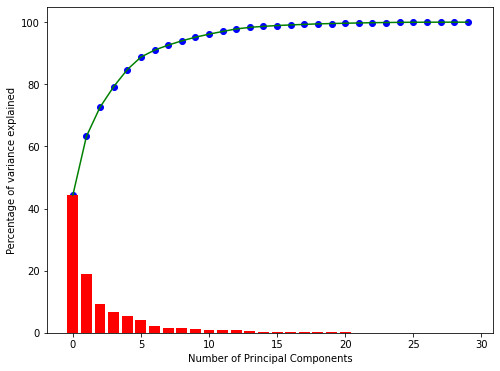

In [ ]:
total = np.sum(eig_vals)
eig_val = 100 * eig_vals/total
eig_val = sorted(eig_val, reverse=True)


plt.figure(figsize = (8, 6))
plt.xlabel("Number of Principal Components")
plt.ylabel("Percentage of variance explained")
plt.bar(range(30), eig_val[:30], color = "red")
plt.plot(range(30), np.cumsum(eig_val[:30]), color = "green")
plt.scatter(range(30), np.cumsum(eig_val[:30]), color = "blue")

### 5. Reducing the dimensions of the dataset

----

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1), 
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))

Y_3PCs = X_std.dot(matrix_w)

print(Y_3PCs)

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]


In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1), 
                      eig_pairs[1][1].reshape(30,1)))

Y_2PCs = X_std.dot(matrix_w)

print(Y_2PCs)

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


## New datasets in 2 and 3 dimensions

---

In [ ]:
final_df_2PCs = pd.DataFrame(columns=["PC1", "PC2", "Label"])

for i in range(len(Y_2PCs)):
    
    dicti = dict()
    
    dicti["PC1"] = Y_2PCs[i, 0]
    dicti["PC2"] = Y_2PCs[i, 1]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"
    
    final_df_2PCs = final_df_2PCs.append(dicti, ignore_index = True)

final_df_2PCs.head()

,PC1,PC2,Label
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign


In [ ]:
final_df_3PCs = pd.DataFrame(columns=["PC1", "PC2", "PC3","Label"])

for i in range(len(Y_3PCs)):
    
    dicti = dict()
    
    dicti["PC1"] = Y_3PCs[i, 0]
    dicti["PC2"] = Y_3PCs[i, 1]
    dicti["PC3"] = Y_3PCs[i, 1]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"
    
    final_df_3PCs = final_df_3PCs.append(dicti, ignore_index = True)

final_df_3PCs.head()

,PC1,PC2,PC3,Label
0,9.192837,1.948583,1.948583,Benign
1,2.387802,-3.768172,-3.768172,Benign
2,5.733896,-1.075174,-1.075174,Benign
3,7.122953,10.275589,10.275589,Benign
4,3.935302,-1.948072,-1.948072,Benign


## Visualisation

In [ ]:
fig = px.scatter(final_df_2PCs, x='PC1', y='PC2', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

In [ ]:
fig = px.scatter_3d(final_df_3PCs, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

# USING SVD

#### 1. Standardisation

---


In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print("Mean: ",X_std.mean())
print("Standard Deviation: ",X_std.std())

Mean:  -6.826538293184326e-17
Standard Deviation:  1.0


In [ ]:
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd

### 2. Calculating U, Sigma and V matrices
---

In [ ]:
def eigenvalue(A, v):
    val = A @ v / v
    return val[0]

def svd_dominant_eigen(A, epsilon=0.01):
    """returns dominant eigenvalue and dominant eigenvector of matrix A"""
    n, m = A.shape
    k=min(n,m)
    v = np.ones(k) / np.sqrt(k)
    if n > m:
        A = A.T @ A
    elif n < m:
        A = A @ A.T
    
    ev = eigenvalue(A, v)

    while True:
        Av = A@ v
        v_new = Av / np.linalg.norm(Av)
        ev_new = eigenvalue(A, v_new)
        if np.abs(ev - ev_new) < epsilon:
            break

        v = v_new
        ev = ev_new

    return ev_new, v_new

def svd(A, k=None, epsilon=1e-10):
    """returns k dominant eigenvalues and eigenvectors of matrix A"""
    A = np.array(A, dtype=float)
    n, m = A.shape
        
    svd_so_far = []
    if k is None:
      k = min(n, m)

    for i in range(k):
        matrix_for_1d = A.copy()

        for singular_value, u, v in svd_so_far[:i]:
            matrix_for_1d -= singular_value * np.outer(u, v)

        if n > m:
            _, v = svd_dominant_eigen(matrix_for_1d, epsilon=epsilon)  # next singular vector
            u_unnormalized = A @ v
            sigma = np.linalg.norm(u_unnormalized)  # next singular value
            u = u_unnormalized / sigma
        else:
            _, u = svd_dominant_eigen(matrix_for_1d, epsilon=epsilon)  # next singular vector
            v_unnormalized = A.T @ u
            sigma = np.linalg.norm(v_unnormalized)  # next singular value
            v = v_unnormalized / sigma

        svd_so_far.append((sigma, u, v))

    singular_values, us, vs = [np.array(x) for x in zip(*svd_so_far)]
    return singular_values, us.T, vs

In [ ]:
s, u, v = svd(X_std)

### 3. Calculating the variance 
---

In [ ]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)

In [ ]:
var_explained

array([0.443, 0.19 , 0.094, 0.066, 0.055, 0.04 , 0.023, 0.016, 0.014,
       0.012, 0.01 , 0.009, 0.008, 0.005, 0.003, 0.003, 0.002, 0.002,
       0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   , 0.   ])

Reducing our dataset to 2 dimensions would preserve 63% of the variance and reducing it to 3 dimensions would preserve 72% of the variance

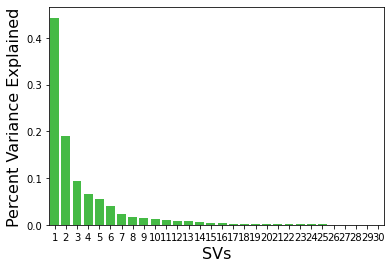

In [ ]:
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

### Reducing dimensions of the dataset
---

New dataset in 2 dimensions

In [ ]:
final_df_2SVs = pd.DataFrame(columns=["SV1", "SV2", "Label"])

for i in range(len(u)):
    
    dicti = dict()
    
    dicti["SV1"] = u[i, 0]
    dicti["SV2"] = u[i, 1]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"
    
    final_df_2SVs = final_df_2SVs.append(dicti, ignore_index = True)

final_df_2SVs.head()

,SV1,SV2,Label
0,-0.105747,-0.034242,Benign
1,-0.027467,0.066217,Benign
2,-0.065958,0.018894,Benign
3,-0.081937,-0.180569,Benign
4,-0.045269,0.034233,Benign


In [ ]:
final_df_2SVs.shape

(569, 3)

In [ ]:
fig = px.scatter(final_df_2SVs, x='SV2', y='SV1', color='Label', title="Singular Value Decomposition")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

New Dataset in 3 dimensions

In [ ]:
final_df_3SVs = pd.DataFrame(columns=["SV1", "SV2", "SV3", "Label"])

for i in range(len(u)):
    
    dicti = dict()
    
    dicti["SV1"] = u[i, 0]
    dicti["SV2"] = u[i, 1]
    dicti["SV3"] = u[i, 2]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"
    
    final_df_3SVs = final_df_3SVs.append(dicti, ignore_index = True)

final_df_3SVs.head()

,SV1,SV2,SV3,Label
0,-0.105747,-0.034242,-0.028049,Benign
1,-0.027467,0.066217,-0.013218,Benign
2,-0.065958,0.018894,-0.013779,Benign
3,-0.081937,-0.180569,-0.080734,Benign
4,-0.045269,0.034233,0.034707,Benign


In [ ]:
fig = px.scatter_3d(final_df_3SVs, x='SV1', y='SV2', z='SV3', color='Label')
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")